# Homework 1
1. **Roundoff error in long term integrations of planetary orbits**

Roundoff errors can accumulate in situations where you have to carry out a sequence of many operations. Modelling the growth of the error over $N$ operations as a random walk gives *Brouwer's law* which states that the total error after $N$ steps will be $\approx \sqrt{N} \epsilon$ (where $\epsilon \sim 10^{-16}$ for double precision floats).

A classic example of this is when integrating planetary orbits. One method for doing this is the *semi-implicit Euler method*, which involves updating the velocity and position of the planet from timestep $n$ to timestep $n+1$ according to

$$\vec{v}_{n+1} = \vec{v}_n + \vec{a}_{n}\Delta t$$
$$\vec{x}_{n+1} = \vec{x}_n + \vec{v}_{n+1}\Delta t$$

where $\Delta t$ is the timestep, and $\vec{x}$, $\vec{v}$ and $\vec{a}$ are the position, velocity, and acceleration respectively. Note that in this scheme the velocity is updated first, using the acceleration, and then the new value of velocity is used to update the particle position. 

(a) Write a code which uses the semi-implicit Euler method to follow the Earth's orbit around the Sun. Integrate the orbit for one year and plot the orbit in the $x$-$y$ plane to check that the Earth moves as expected. 

[You can assume for simplicity that the Sun is fixed at the origin and the Earth moves in a circular orbit under the (Newtonian) gravity of the Sun. Useful values are: $(GM)_\mathrm{Sun} = 1.3271\times 10^{20}$ in SI units and the Earth-Sun distance (astronomical unit) $1.496\times 10^{11}\ {\rm m}$.]

Text(0.5, 1.0, "Earth's orbit around the Sun")

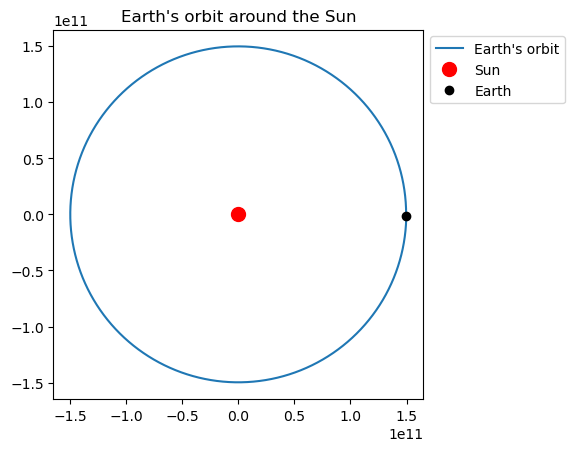

In [8]:
import numpy as np, matplotlib.pyplot as plt

# Functions
def ac(r): #  Acceleration on Earth due to the Sun
    a = -GM/((np.linalg.norm(r))**3)
    return a

def orbit(v_y0, x0,n):
    # Create array of zeros for our variables
    r_x = np.zeros(n)
    r_y = np.zeros(n)
    v_x = np.zeros(n)
    v_y = np.zeros(n)
    v_y[0] = v_y0
    r_x[0] = x0

    # Iteration to calculate new positions and velocities
    for i in range(n-1):
        a = ac(np.array([r_x[i],r_y[i]]))
        v_x[i+1] = v_x[i] + r_x[i]*a*dt
        v_y[i+1] = v_y[i] + r_y[i]*a*dt
        r_x[i+1] = r_x[i] + v_x[i]*dt
        r_y[i+1] = r_y[i] + v_y[i]*dt
    return r_x, r_y, v_x, v_y
# Initial parameters
n = 100001 # Number of time intervals
t = np.linspace(0,3.1536e7,n) # array of seconds from 0 to 1 year
dt = t[1]-t[0]
# Definition of constants
GM = 1.3271e20 # heliocentric gravitational constant [m^3/s]
d = 1.496e11 # distance betweeen Earth and Sun [m]
v_0 = np.sqrt(GM/d)

# Calculate the orbit
[r_x, r_y, v_x, v_y] = orbit(v_0,d,n)


# Plot Earth's orbit
plt.plot(r_x,r_y, label="Earth's orbit")
plt.axis('square')
plt.plot(0,0,'ro',markersize=10, label='Sun')
plt.plot(r_x[-1],r_y[-1],'ko',label='Earth')
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.title("Earth's orbit around the Sun")


(b) Try using different time-steps $\Delta t$ for your one-year integration, and check how well the code conserves energy by evaluating the total energy (kinetic plus gravitational) associated with the Earth's motion and comparing with the starting value. 
Start with a timestep of $0.1$ years and go down to as small a value as you can integrate in a reasonable time (I was able to get to $10^{-9}\ {\rm years}$ which took about 10 minutes to run). 

Plot the fractional change in energy over the orbit $\Delta E/E=(E_\mathrm{final}-E_\mathrm{initial})/E_\mathrm{initial}$ against timestep $\Delta t$ and against the number of steps $N$.  (It's helpful to make these log-log plots). Discuss the scaling of $\Delta E/E$ with $\Delta t$ (or $N$) that you find. How does it behave for large and small $\Delta t$ (or $N$)? Do you see any evidence for Brouwer's law?

In [29]:
E_0 = -v_0**2/2 + GM/d # Total initial energy

def energy(v,r):
    E = -v**2/2+GM/r
    return E
def energy2(v,r):
    if type(v) is np.float64:
        n = 1
        E = -v**2/2+GM/r
    else:
        n = len(v)
        E = np.zeros(n)
        for i in range(n):
            E[i] = -v[i]**2/2+GM/r[i]
    return E
r = np.linalg.norm(np.array([r_x[-1],r_y[-1]]), axis=0)
v = np.linalg.norm(np.array([v_x[-1],v_y[-1]]), axis=0)
E = energy(v,r)
e = np.abs(E-E_0)/E_0
print(f"The error es of {e}")


The error es of 0.06832186626281103


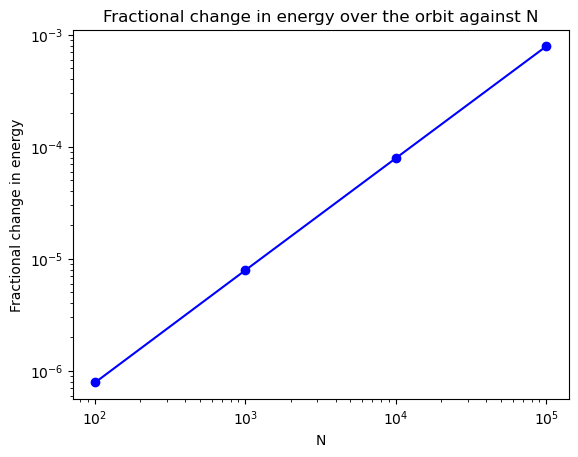

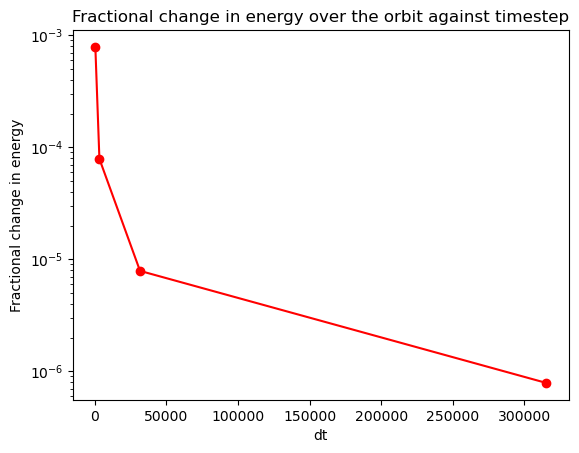

In [34]:
Ns = np.array([101,1001,10001,  100001])
error = np.zeros(len(Ns))
for i, N in enumerate(Ns):
    [r_x, r_y, v_x, v_y] = orbit(v_0,d,N)
    r = np.linalg.norm(np.array([r_x[-1],r_y[-1]]), axis=0)
    v = np.linalg.norm(np.array([v_x[-1],v_y[-1]]), axis=0)
    error[i] = np.abs(energy(v,r)-E_0)
plt.plot(Ns,error/E_0,'bo-')
dts = 3.1536e7/(Ns-1)
plt.loglog()
plt.title("Fractional change in energy over the orbit against N")
plt.xlabel('N')
plt.ylabel('Fractional change in energy')
plt.show()


plt.plot(dts, error/E_0,'ro-')
plt.yscale('log')
plt.title("Fractional change in energy over the orbit against timestep")
plt.xlabel('dt')
plt.ylabel('Fractional change in energy')
plt.show()

As the timestep decreases, one would expect the fractional change in energy to decrease. But there's a limit, which is given by the Brouwer's law, in this case, this limit would be around the dt where we get a fractional change of an order around $10^{-16}$. In this code, I got stuck in an error that to the date I have yet to solve, but I wanted to write what one would actually expect